In [2]:
import pandas as pd
import seaborn as sns

# TP3 : Statistical Analysis
## Exo 1 :
    Implement a PSO algorithm to solve continuous optimization problems.
## Exo 2 :

    Test your implementation on the Rastrigin function with 10 dimensions
    using the Gbest topology with 5, 10, 20, 50 particles. Use ψ1 = ψ2 = 1.0
    coefficients. Termination condition is 50 iterations. Repeat for 20 runs
    and compare the results using the statistical tools you used for ACO

The script to launch the exercices are in the Launch_PSO.py file

### Functions to compute analysis

In [3]:
def get_aggregate_analysis(particles, path):
    """
    Compute the distribution of solution quality over multiple runs of one experience
    :param particles: the number of particules for one experience
    :param path: the path of the results file
    :return: a tuple of dataframes one for the mean values over the run and one for the best value for each run
    """
    path_one_battery_of_test = f"{path}rastrigin_nb_particules_{particles}_run"

    all_dfs = []
    for i in range(20):
        current_df = pd.read_csv(f"{path_one_battery_of_test}_{i}.csv")
        current_df["run"] = i
        #current_df["particles"] = particles
        all_dfs.append(current_df)
    concatenated_df = pd.concat(all_dfs)
    #concatenated_df["tours"] = concatenated_df["tours"]//ants
    mean_best_length_per_tours = concatenated_df.groupby("iterations")["best_solution"].mean().reset_index()
    repartition_of_best_length = concatenated_df.groupby("run")["best_solution"].min().reset_index()
    return mean_best_length_per_tours, repartition_of_best_length


def compute_all_analysis(particles_range, path):
    """
    Compute all experiences results for each particles number in the particles range
    :param particles_range: range of particles to test
    :param path: the prepend text of the files of the experience results
    :return: a dictionary of the mean and min results
    """
    mean_list = []
    min_list = []
    for particles in particles_range:
        mean, min = get_aggregate_analysis(particles, path)
        mean["particles"] = particles
        min["particles"] = particles
        mean_list.append(mean)
        min_list.append(min)
    return {
        "mean": pd.concat(mean_list),
        "min": pd.concat(min_list)
    }

In [4]:
path = f"results/exo_2/"
pso_exo_2 = compute_all_analysis([5,10,20,50], path)

[Text(0.5, 1.0, 'Evolution of best solution found accross number of particles')]

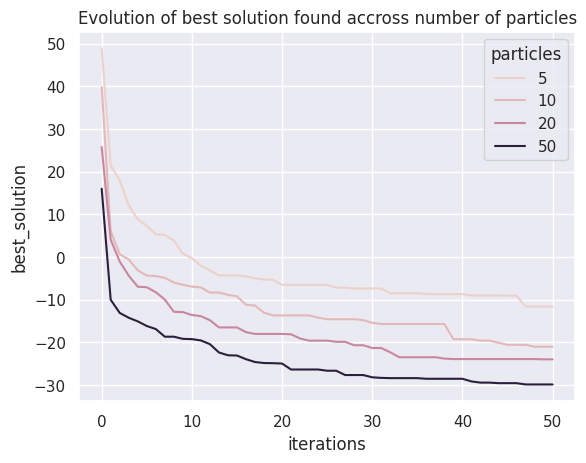

In [5]:
sns.set_theme()
sns.lineplot(data=pso_exo_2["mean"], x="iterations", y="best_solution", hue="particles").set(title="Evolution of best solution found accross number of particles")

We observe that as the number of particles increases, the best solution decreases (and therefore improves since we are in a minimization problems)

[Text(0.5, 1.0, 'Distribution of best solution found for each number of particles over 20 runs')]

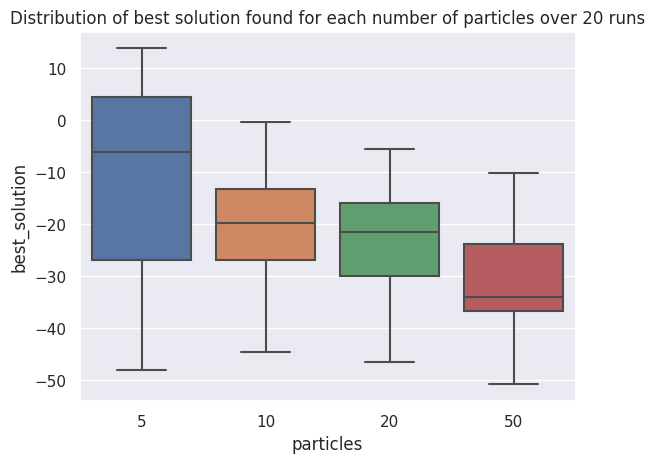

In [6]:
sns.boxplot(
    data=pso_exo_2["min"], x="particles", y="best_solution"
).set(title="Distribution of best solution found for each number of particles over 20 runs")

While looking at the box plot, we can observe that with 5 particles, our model has high variance, the interquartile range is much higher. On top of that, seen before the best solution median is much higher than the others. 10,20,50 have same interquartile range more or less and the difference between 10 and 20 does not seems significant.
For 50 particles the improve is much better in particular with respect to the median

## Exercice 3

    Repeat with the same settings, but using star and ring topology. How do
    the results differ?

In [7]:
pso_exo_3 = {}

In [8]:
path_gbest = f"results/exo_3/topology_gbest_"
path_wheel= f"results/exo_3/topology_wheel_"
path_ring=  f"results/exo_3/topology_ring_"

pso_exo_3["gbest"] = compute_all_analysis([5,10,20,50], path_gbest)
pso_exo_3["wheel"]= compute_all_analysis([5,10,20,50], path_wheel)
pso_exo_3["ring"]= compute_all_analysis([5,10,20,50], path_ring)

Catplot of boxplot of distribution of results for each topology for each particles over 20 runs

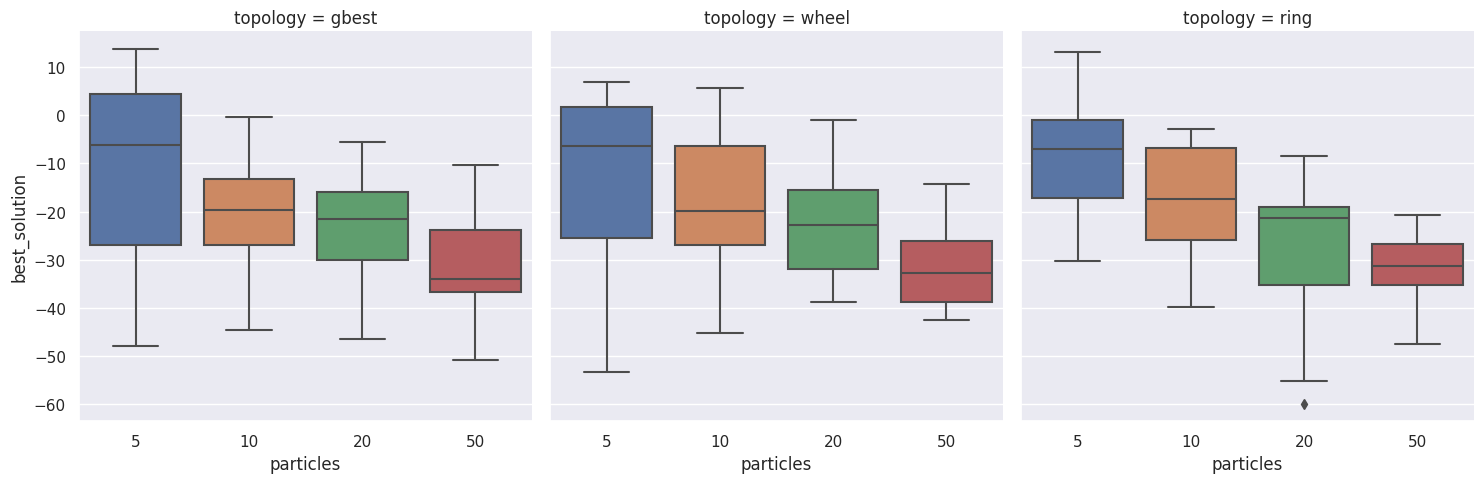

In [9]:
pso_exo_3["gbest"]["min"]["topology"] = "gbest"
pso_exo_3["wheel"]["min"]["topology"] = "wheel"
pso_exo_3["ring"]["min"]["topology"] = "ring"

sns.catplot(
    data=pd.concat([pso_exo_3["gbest"]["min"], pso_exo_3["wheel"]["min"], pso_exo_3["ring"]["min"]]), x="particles", y="best_solution",
    col="topology",
    kind="box", sharey=True
)

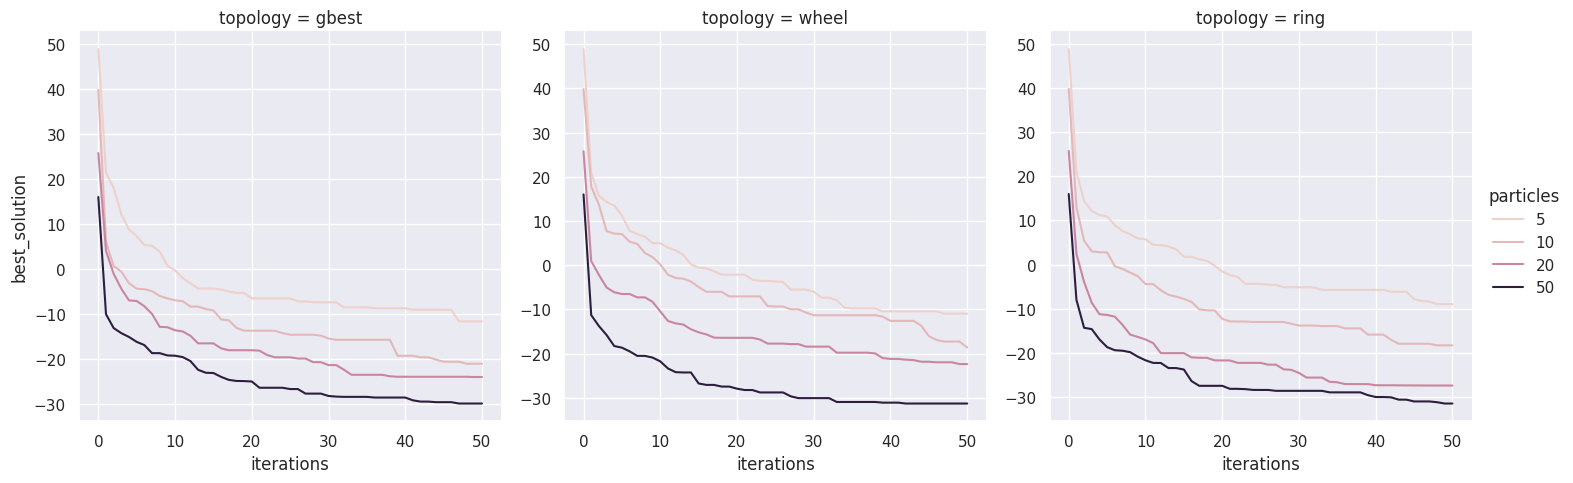

In [10]:
pso_exo_3["gbest"]["mean"]["topology"] = "gbest"
pso_exo_3["wheel"]["mean"]["topology"] = "wheel"
pso_exo_3["ring"]["mean"]["topology"] = "ring"

sns.relplot(pd.concat([pso_exo_3["gbest"]["mean"], pso_exo_3["wheel"]["mean"], pso_exo_3["ring"]["mean"]]), x="iterations", y="best_solution", hue="particles", col="topology", kind="line", facet_kws={'sharey': False, 'sharex': True})

In mean the wheel seems to have much higher difference betweens the the number of particles than for gbest. Ring seems to be same case as for wheel. In Ring the difference between 20 and 50 particles is not  that big.